In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('Zoo.csv')

In [10]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
df.shape

(101, 18)

In [12]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [18]:
target=df['animal name']
features=df.drop(columns=['animal name'])

In [20]:
features.shape

(101, 17)

# Visualization

In [28]:
columns=["hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize","type"]
  

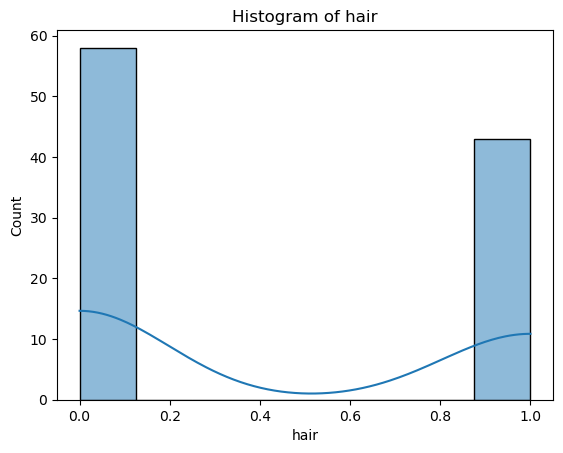

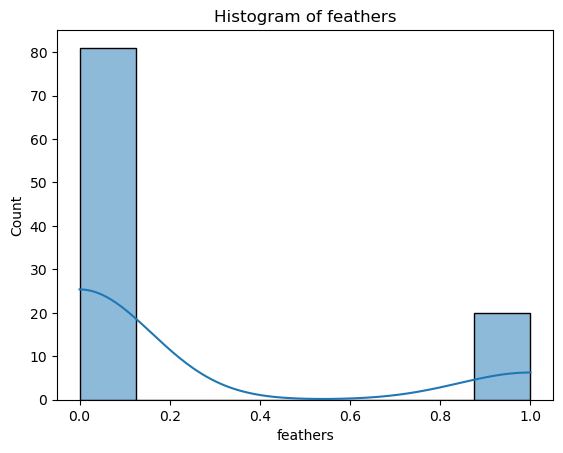

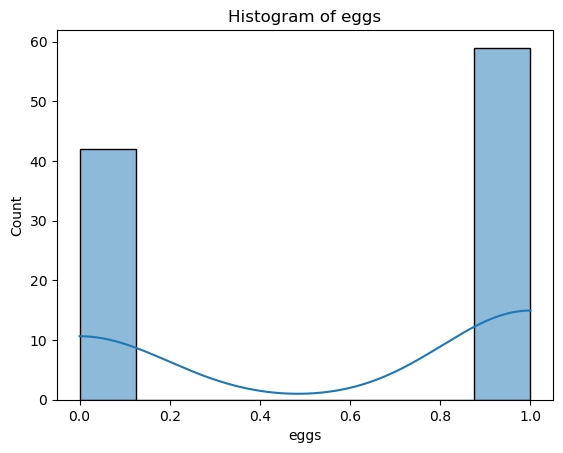

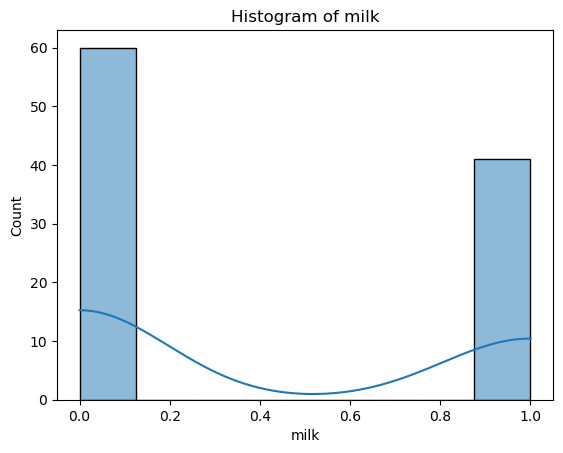

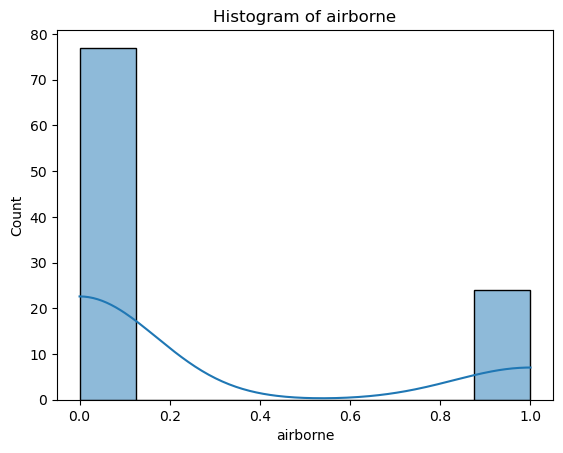

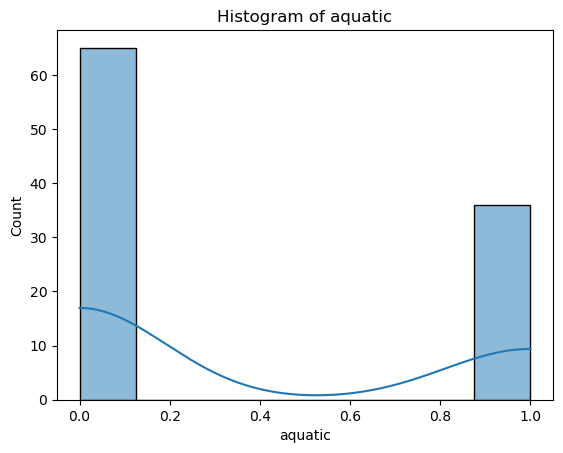

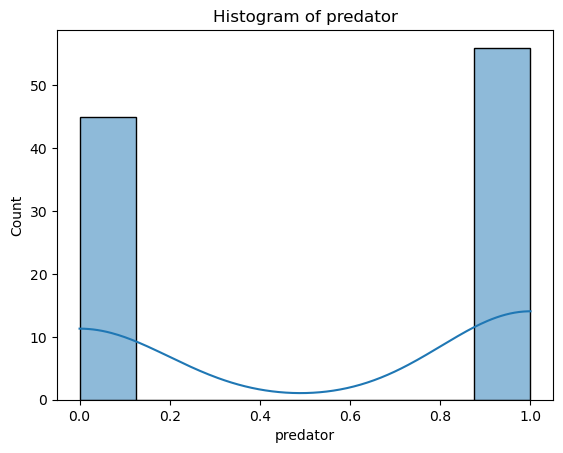

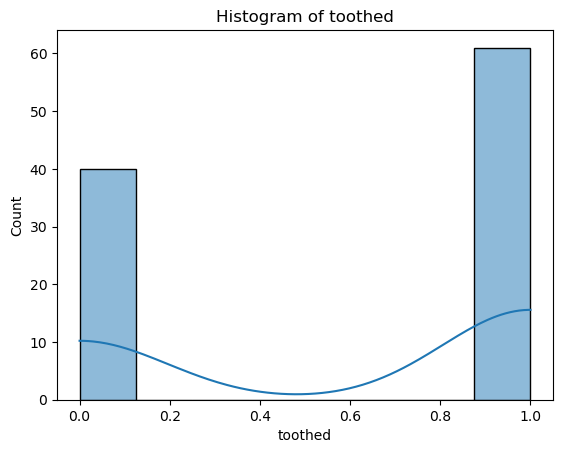

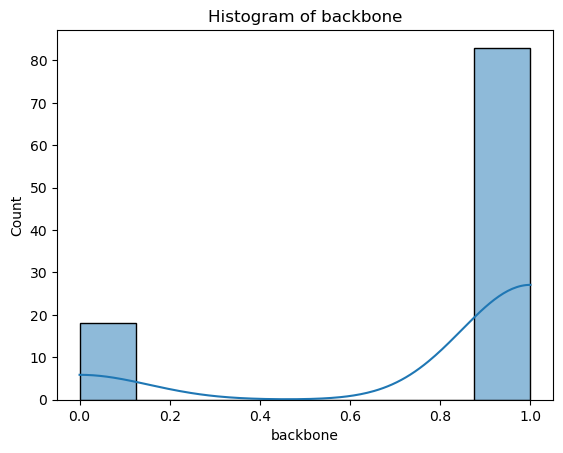

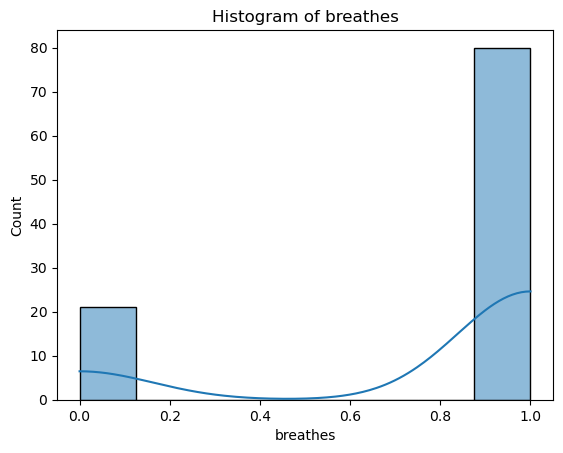

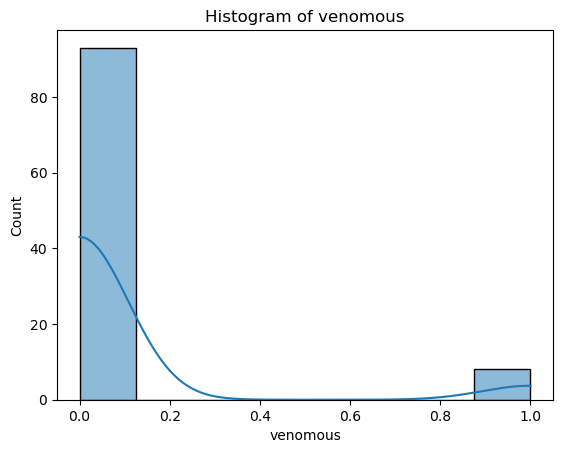

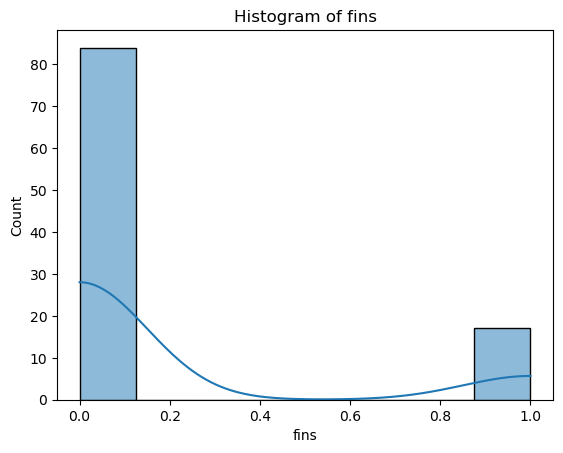

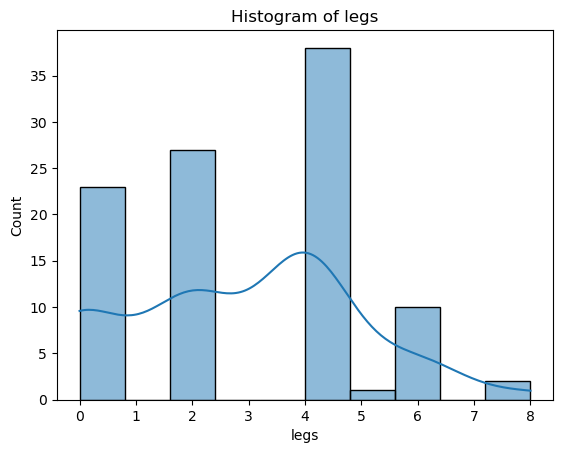

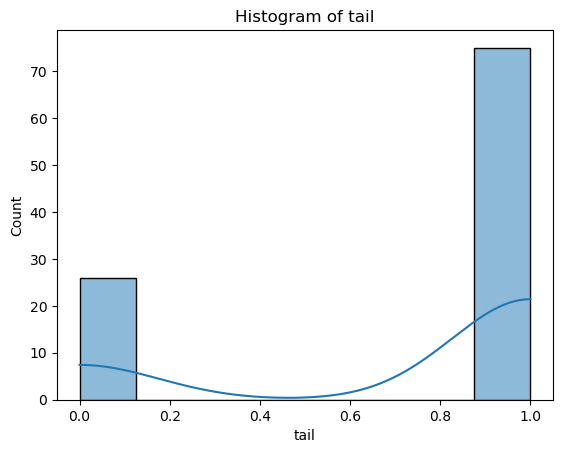

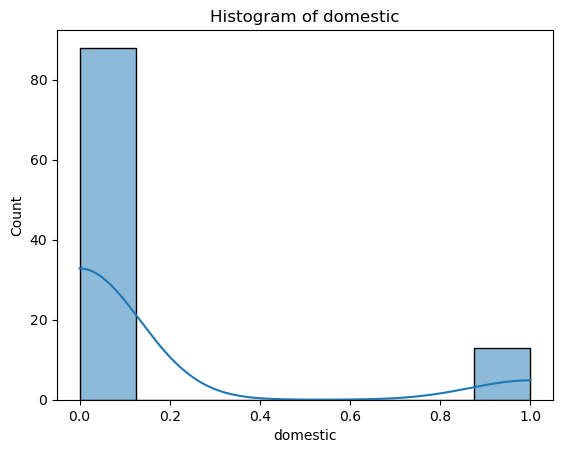

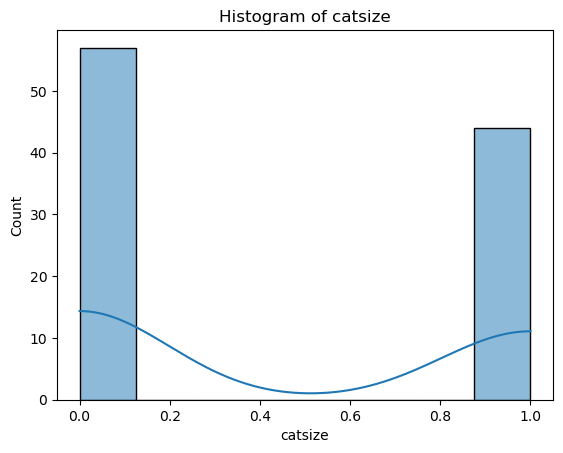

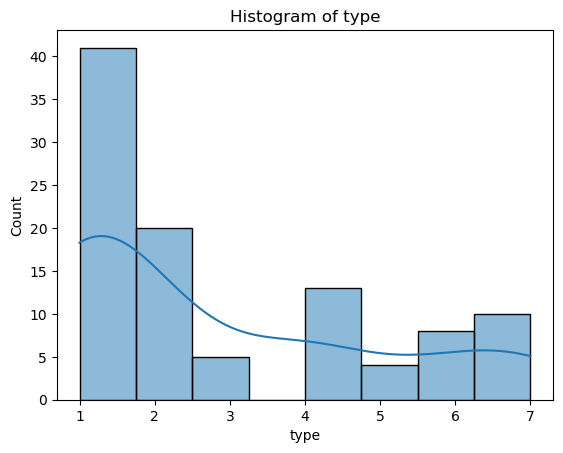

In [31]:
for a in columns:
    plt.figure()
    sns.histplot(df[a],kde=True)
    plt.title(f"Histogram of {a}")
    plt.show()

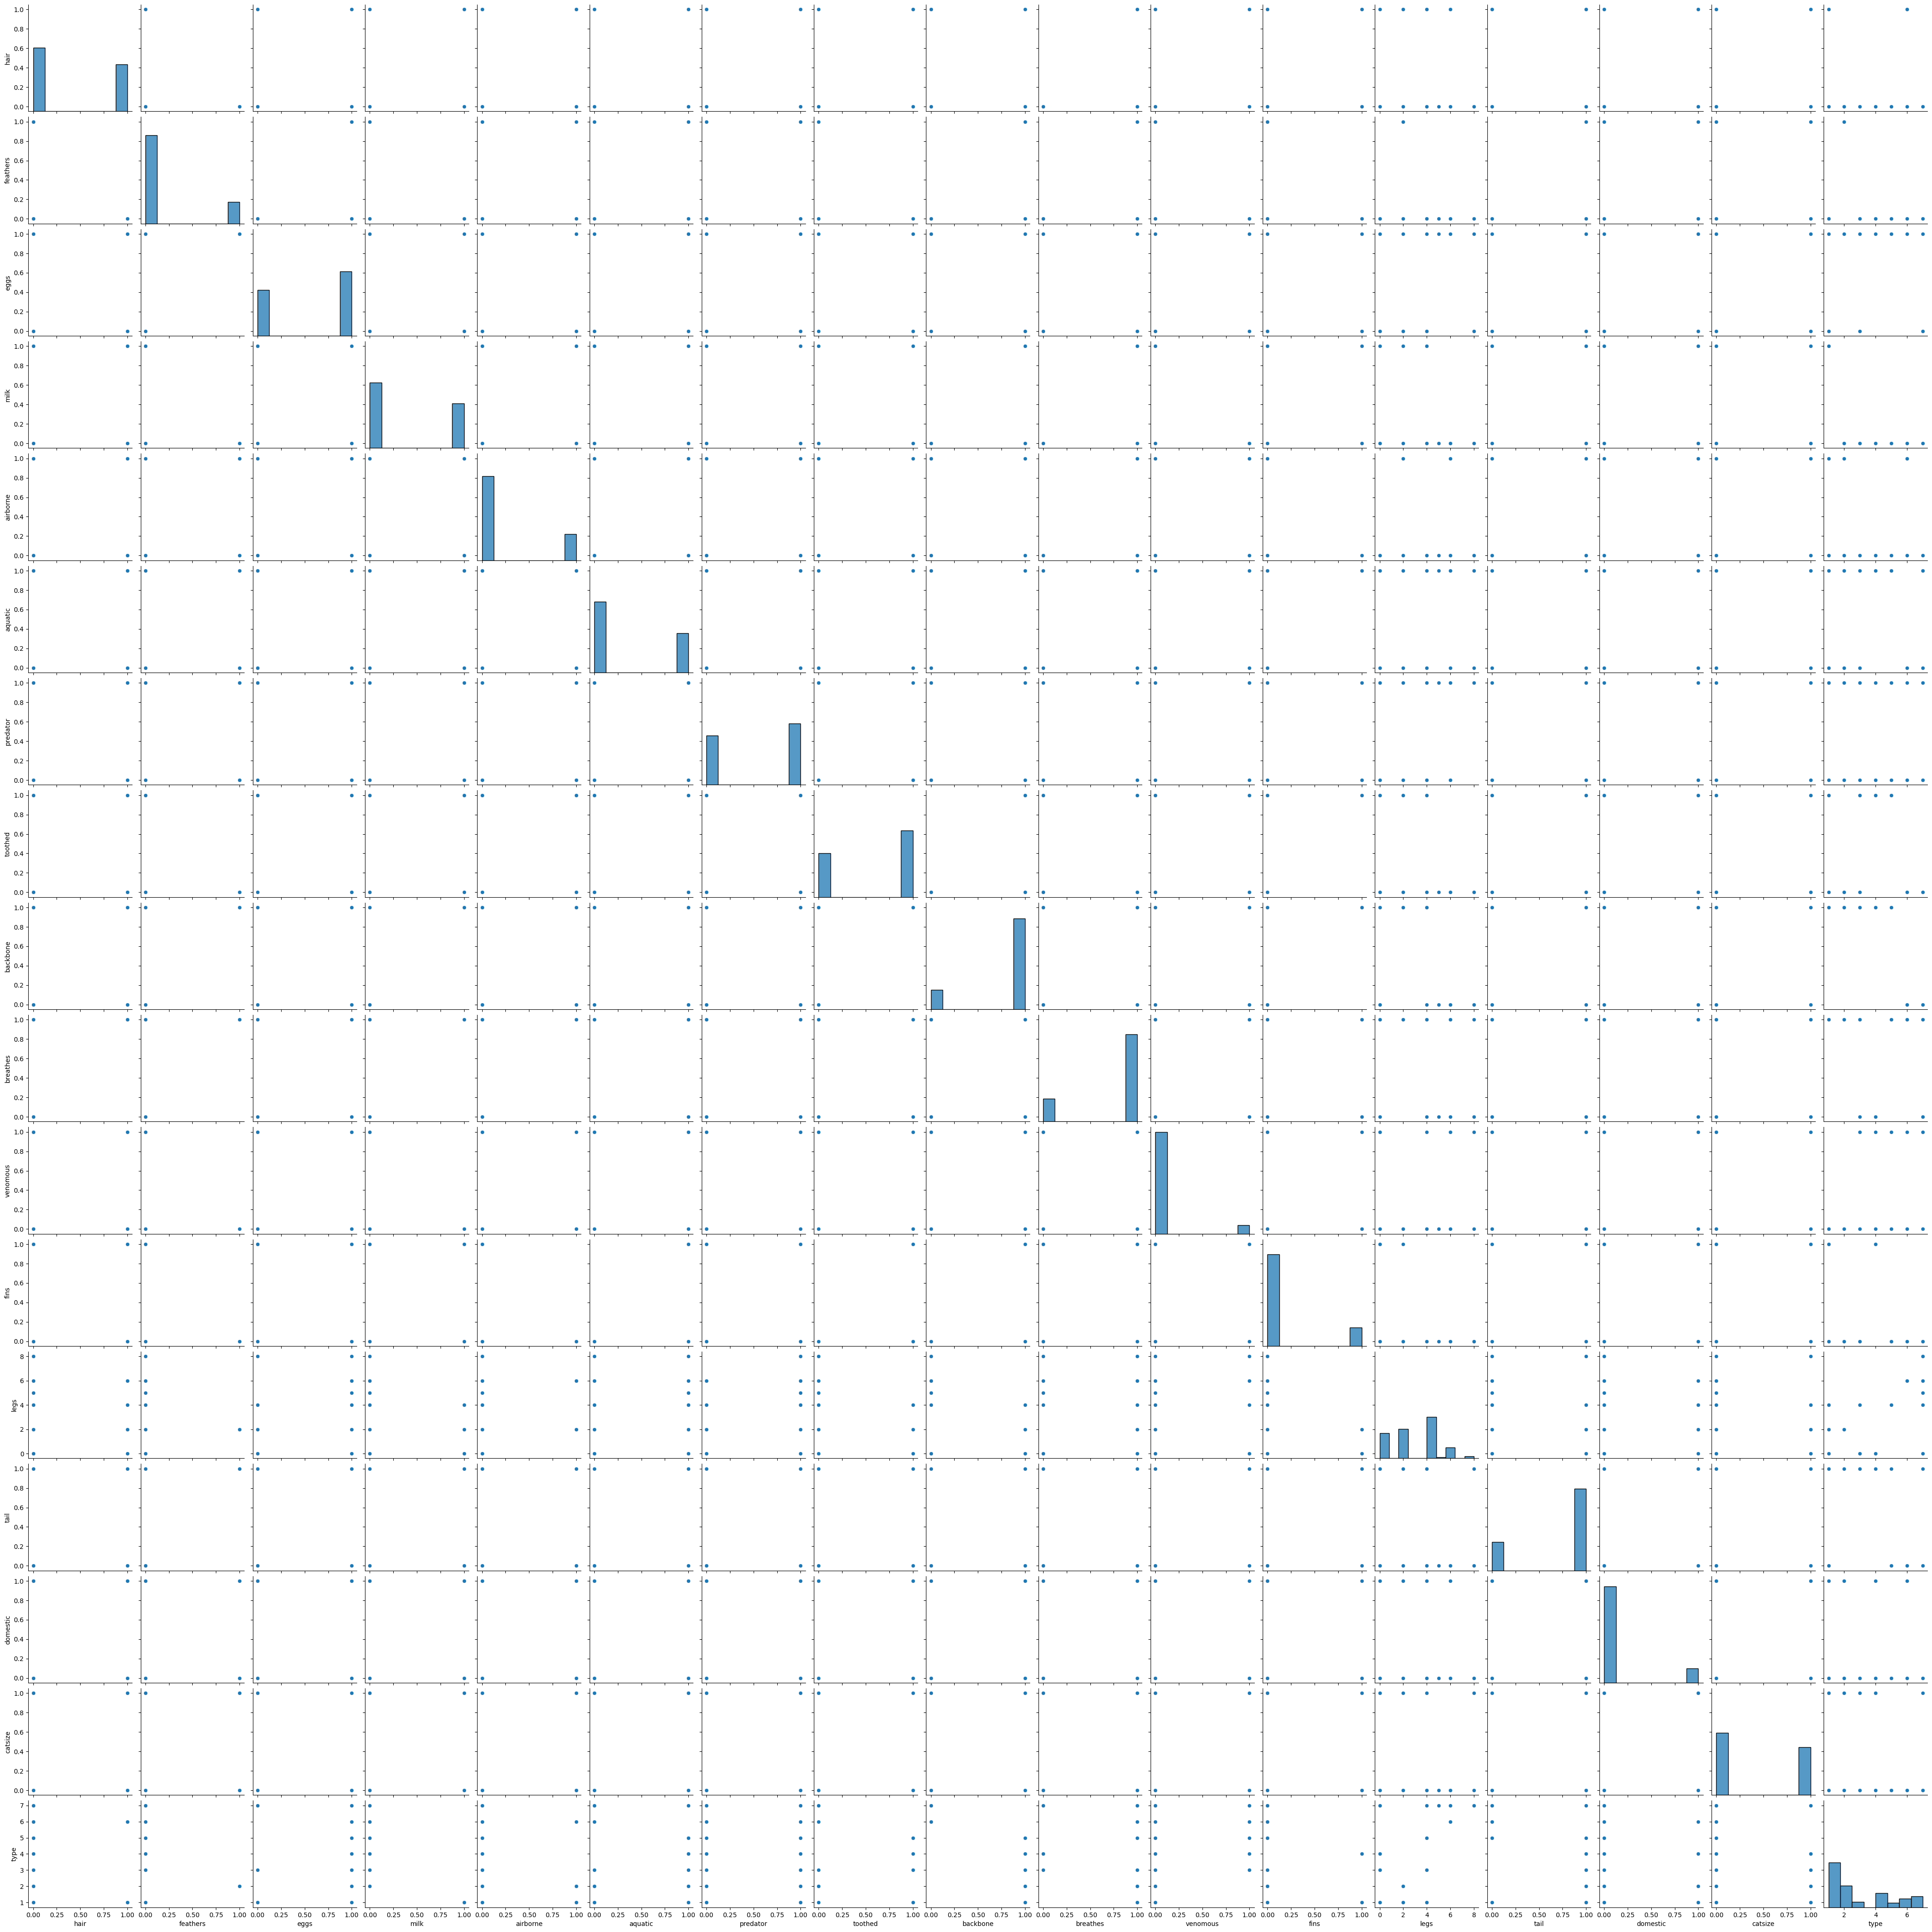

In [34]:
sns.pairplot(df)
plt.show()

In [36]:
num_col=df.select_dtypes(include=["float","int"])
num_col

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


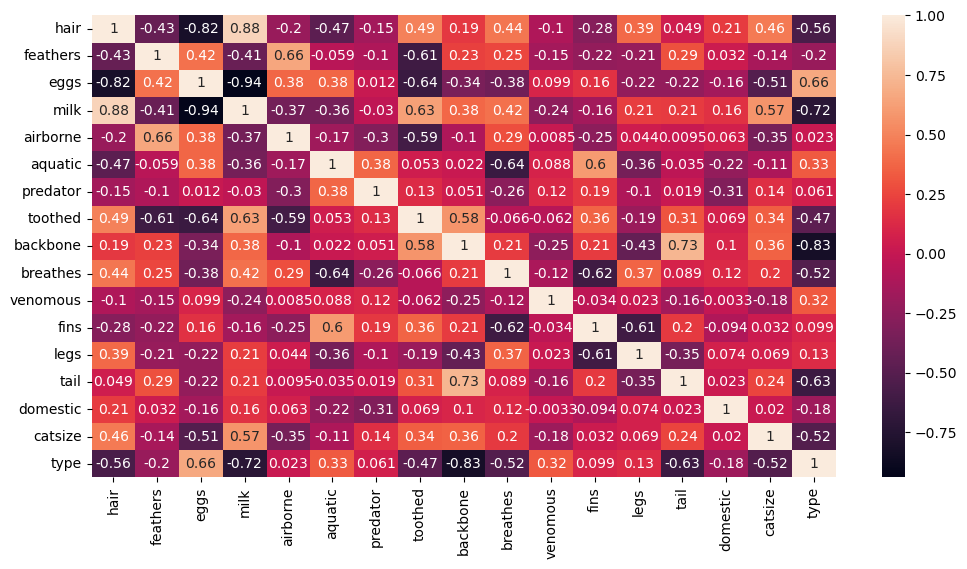

In [37]:
plt.figure(figsize=(12,6))
corr=num_col.corr()
sns.heatmap(corr,annot=True)
plt.show()

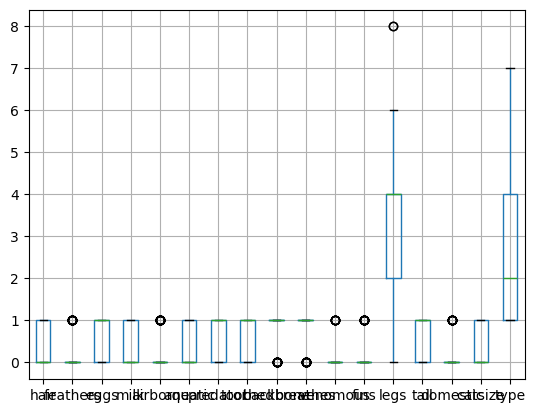

In [38]:
df.boxplot()
plt.show()

In [39]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Extreme=Q1-1.5*IQR
    Upper_Extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:Lower_Extreme if x<Lower_Extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

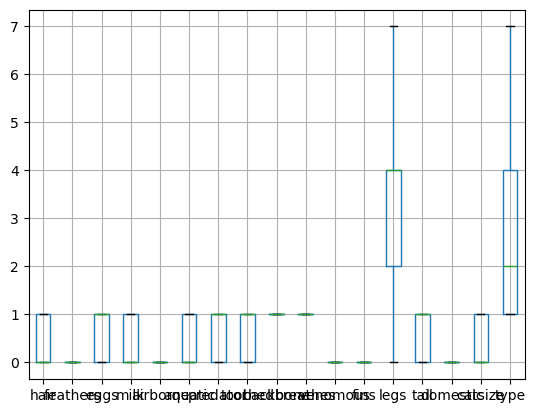

In [40]:
df.boxplot()
plt.show()

## Training and splitting of the data 

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score

In [43]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 17)
(21, 17)
(80,)
(21,)


In [44]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [45]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn.fit(x_test,y_test)

KNeighborsClassifier(n_neighbors=1)

In [46]:
y_pred=knn.predict(x_train)
y_pred

array(['vampire', 'hawk', 'hawk', 'buffalo', 'buffalo', 'hawk', 'chicken',
       'moth', 'chicken', 'wallaby', 'hamster', 'polecat', 'seahorse',
       'hare', 'polecat', 'polecat', 'hamster', 'sealion', 'stingray',
       'moth', 'stingray', 'polecat', 'termite', 'termite', 'stingray',
       'hawk', 'buffalo', 'hare', 'frog', 'polecat', 'stingray',
       'polecat', 'seahorse', 'polecat', 'moth', 'kiwi', 'hawk',
       'termite', 'termite', 'termite', 'kiwi', 'seahorse', 'stingray',
       'polecat', 'sealion', 'seahorse', 'buffalo', 'tuatara', 'seahorse',
       'hamster', 'polecat', 'hare', 'seahorse', 'polecat', 'hawk',
       'seahorse', 'seahorse', 'buffalo', 'hamster', 'polecat', 'vampire',
       'seahorse', 'hamster', 'hawk', 'gull', 'stingray', 'termite',
       'seahorse', 'seahorse', 'frog', 'sealion', 'termite', 'frog',
       'polecat', 'polecat', 'gull', 'duck', 'polecat', 'termite',
       'seahorse'], dtype=object)

In [47]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

# accuracy score

In [48]:
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)


0.9523809523809523

# F1 score

In [49]:
y_pred=knn.predict(x_test)
f1_score(y_test,y_pred,average='weighted')

0.9365079365079364

# precision score

In [52]:
y_pred=knn.predict(x_test)
precision_score(y_test,y_pred,average='weighted')

0.9285714285714286

# recall score

In [53]:
y_pred=knn.predict(x_test)
recall_score(y_test,y_pred,average='weighted')

0.9523809523809523

In [54]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = knn.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9523809523809523
              precision    recall  f1-score   support

     buffalo       1.00      1.00      1.00         1
     chicken       1.00      1.00      1.00         1
        duck       1.00      1.00      1.00         1
        frog       1.00      1.00      1.00         2
        girl       1.00      1.00      1.00         1
        gull       0.50      1.00      0.67         1
     hamster       1.00      1.00      1.00         1
        hare       1.00      1.00      1.00         1
        hawk       1.00      1.00      1.00         1
        kiwi       1.00      1.00      1.00         1
        moth       1.00      1.00      1.00         1
     polecat       1.00      1.00      1.00         1
    seahorse       1.00      1.00      1.00         1
     sealion       1.00      1.00      1.00         1
     skimmer       0.00      0.00      0.00         1
    stingray       1.00      1.00      1.00         1
     termite       1.00      1.00      1.00         

# visualize and decision boundraies

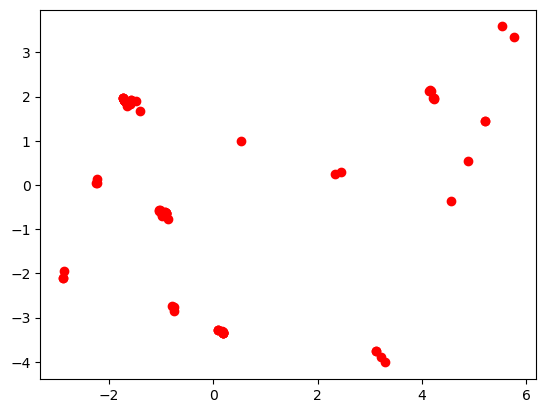

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_reduced=pca.fit_transform(x_train,y_train)
plt.scatter(X_reduced[:,0], X_reduced[:, 1],color="red")
plt.show()

##  1. What are the key hyperparameters in KNN?
In the K-Nearest Neighbors (KNN) algorithm, hyperparameters are parameters that are set prior to the training process and are not learned from the data. The key hyperparameters in KNN are;Number of neighbors (k),Distance metric,Weights,Algorithm,Leaf size

## 2. What distance metrics can be used in KNN?
In K-Nearest Neighbors (KNN), distance metrics are used to measure the similarity or dissimilarity between data points. Several distance metrics can be employed in KNN, depending on the nature of the data and the problem domain. Some common distance metrics used in KNN include:
Euclidean distance,Manhattan distance (City block distance or L1 distance),Minkowski distance,Chebyshev distance,Cosine similarity